Propuesta del Proyecto: 

Objetivos:

* Desarrollar un método robusto para la detección y filtrado de outliers que mejore la calidad de los datos.

* Implementar un flujo de trabajo reproducible y transparente que permita una validación y revisión cruzada.

Desafío: La extracción de salmueras requiere un balance cuidadoso entre la maximización de la producción y la preservación del ecosistema del salar. Las operaciones en el Salar de Atacama enfrentan el reto constante de pronosticar con precisión el flujo y la concentración de iones en los pozos de extracción. Estos pronósticos son cruciales para la planificación operativa y la toma de decisiones estratégicas a corto y largo plazo.

Necesidad de Mejora: Recientemente se ha identificado una necesidad crítica de mejorar la trazabilidad y reproducibilidad de los Escenarios de Oferta, que son pronósticos semestrales utilizados para la planificación operativa y estratégica. Las deficiencias en la metodología actual han llevado a decisiones basadas en datos que a veces carecen de la rigurosidad necesaria, poniendo en riesgo la eficacia de la gestión de recursos hídricos.

Proyecto Actual: En respuesta a esta necesidad, se propone fortalecer el análisis de datos y la modelación hidrológica. El enfoque está en la aplicación de técnicas avanzadas de detección de outliers y análisis de datos para asegurar que la información utilizada en los modelos predictivos sea de la más alta calidad, mejorando así la precisión y fiabilidad de los Escenarios de Oferta.

Meta del Proyecto: El objetivo es desarrollar y validar un proceso mejorado para la detección de outliers, lo que resultará en un conjunto de datos optimizado para el modelado predictivo. Este proceso deberá ser transparente, reproducible y fácilmente revisable, garantizando así la integridad y la confianza en las decisiones estratégicas tomadas sobre la base de estos datos.





Preparación de los datos

La información en la cual se basa el pronóstico de caudales, para el periodo septiembre 2023 a septiembre 2025, corresponde a los caudales históricos observados en pozos de producción. Estos datos reales, proporcionados por TEST01, cubren entre enero 2014 a agosto 2023. Pozos adicionales utilizados se proyectan según resultados de escenario E110. En total se utilizaron datos de 444 pozos, pertenecientes a 4 sistemas (Litio Directo, MOP AS, MOP BS y Porteo).

Si bien es parte del procedimiento que las series temporales sean procesadas, aplicando filtros que eliminen datos anómalos (outliers) y exceso de ruido (esto con la finalidad de obtener tendencias principales que puedan proyectarse); en esta oportunidad los datos de entrada filtrados y procesados, fueron entregados por TEST01.

No obstante, en un proceso completo que considera la BBDD global de caudales reales, en cual se realice el proceso de limpieza, se debe considerar una serie de análisis estadísticos y distribución de datos, tanto de la serie completa como por tramos que identifique anomalías, ruido en las series y otros comportamientos relevantes a discriminar. La secuencia general de este procedimiento debe considerar:

1.- Recopilación de datos: Utilizando la BBDD de caudales reales, proveniente de TEST01 (Caudales “Opera”), se deben recopilar todos los datos de la serie temporal de forma completa y precisa. asegurándose de que los datos, fuentes y unidades sean consistentes entre si (por ej. caudales efectivos por día bombeados)

2.- Identificación de valores atípicos: Análisis de los datos a través de técnicas estadísticas, como gráficos de caja y diagramas de dispersión, para identificar valores atípicos. Estos valores pueden distorsionar los análisis posteriores y generar sobreestimación de errores en ajustes, por lo que es importante tratarlos adecuadamente y filtrarlos cuando corresponda (en esta etapa pueden incluirse tanto valores atípicos, caudales nulos, como caudales negativos que se aprecian en la BBDD bruta de caudales)

3.- Suavizado de la serie temporal: El ruido en las series temporales es un problema para los ajustes de los datos por medios de modelos o enfoques analíticos, pues las variaciones aleatorias en los datos difícilmente pueden ser replicadas y representadas en tendencias proyectadas, y a su vez aumentan innecesariamente el error en ajustes posteriores. Aplicar técnicas de suavizado, como promedios móviles o suavizado exponencial, para eliminar el ruido y las variaciones aleatorias en los datos, facilitará la identificación de patrones de comportamiento que tengan coherencia con la tendencia esperada de los datos.

4.- Detección de patrones anómalos: Estos patrones pueden incluir ascensos de caudal por periodos cortos, peaks que escapan de la tendencia histórica, u otras anomalías. Es importante buscar y filtrar patrones anómalos o comportamientos inusuales en la serie temporal. Esto puede implicar el uso de técnicas de anomalías o análisis de tendencias, que posteriormente puedan no ser consideradas para la proyección de caudales

5.- Verificación de consistencia y cambios de tendencias temporales recientes: Por último, dado que hay antecedentes de que ciertos pozos pueden tener cambios de bombeos asociados a una nueva regla operacional, que en ciertos casos pueden implicar un aumento o disminución de tasas de bombeo; que, a su vez, marquen una nueva tendencia o comportamiento a considerar. En estos casos, es importante asegurarse de que los datos del último periodo representen esta nueva tendencia por un periodo dado de tiempo (por ej. dos meses al menos) y no sea parte de mediciones o valores atípicos. Esto es esencial para que futuras proyecciones se ajusten a comportamientos reales de pozos y no tendencias desactualizadas






## La librería NumPy

<div>
<img src="https://github.com/Vokturz/Curso-Python-BCCh/blob/main/clase3/numpy_dalle3.png?raw=true" width="500"/>
</div>

NumPy es una librería especializada en operaciones matemáticas y manipulación de vectores y matrices. Incluye un montón de funciones matemáticas, así como una estructura de datos propia llamada `ndarray` que es mucho más rapida que las listas convencionales de Python y que ademas aporta una mayor versatilidad al permitir describir matrices.

### Script de Limpieza 

### 1.- Importación de archivo 'OperaFull extracción_hyper.csv'


Información de Campos:

* CaudalInstantaneo    
* CaudalMedio
* Densidad             
* Destino              
* FechaMedicionUTS     
* FechaMedicion
* HorasEstimadas       
* Horas                
* HorometroFinal       
* HorometroIncial
* H3BO3
* Cl_pct 
* Ca_pct     
* Li_pct               
* Mg_pct               
* Na_pct
* k_pct 
* S04_pct
* SatK                
* Número de registros  
* Observacion          
* Origen          
* Validez              
* VolumenEstimado      
* VolumenFinal         
* VolumenInicial       
* Volumen              
      

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from IPython.display import display

#### Modularizacion Script para refactorizar el código

In [198]:
def load_csv_data(file_path: str) -> pd.DataFrame:
    """
    Load data from a CSV file with a specified delimiter, handle mixed data types,
    and convert numerical values with comma as decimal separator to float.
    
    Args:
        file_path (str): The path to the CSV file.
        
    Returns:
        pd.DataFrame: Dataframe containing the loaded data.
    """
    # Leer el archivo CSV con el delimitador ';' y manejar tipos de datos mixtos
    df = pd.read_csv(file_path, delimiter=';', on_bad_lines='skip', low_memory=False)
    
    # Reemplazar comas por puntos en todas las columnas
    df = df.apply(lambda x: x.str.replace(',', '.') if x.dtype == 'object' else x)
    
    # Convertir las columnas a tipos numéricos donde sea posible
    df = df.apply(pd.to_numeric, errors='ignore')
    
    return df

In [4]:
def load_csv_data(file_path: str) -> pd.DataFrame:
    """
    Load data from a CSV file with a specified delimiter and handle mixed data types.
    
    Args:
        file_path (str): The path to the CSV file.
        
    Returns:
        pd.DataFrame: Dataframe containing the loaded data.
    """
    # Leer el archivo CSV con el delimitador ';' y manejar tipos de datos mixtos
    df = pd.read_csv(file_path, delimiter=';', on_bad_lines='skip', low_memory=False)
    
    return df

In [9]:
def load_csv_data(file_path: str) -> pd.DataFrame:
    """
    Load data from a CSV file with a specified delimiter and handle mixed data types.
    
    Args:
        file_path (str): The path to the CSV file.
        
    Returns:
        pd.DataFrame: Dataframe containing the loaded data.
    """
    # Leer el archivo CSV 
        # Leer el archivo CSV con el delimitador ';' y manejar tipos de datos mixtos
    df = pd.read_csv(file_path, delimiter=';', on_bad_lines='skip', low_memory=False)
    
    return df

In [10]:
file_path = r'C:\Kedro_Project_Lab\ofertasalmuera\data\01_raw\2024-03-08 Inputs para Escenario E-111\GV_OperaFull Escenario 2024.csv'
df_train = load_csv_data(file_path)

# Display the dataframe
print(df_train)

          Origen         Destino    FechaMedicion VolumenInicial VolumenFinal  \
0       ARPES-01  Canaleta Arpes  01-01-2014 9:01          75447        76219   
1       ARPES-01  Canaleta Arpes  02-01-2014 9:06          76219        76860   
2       ARPES-01  Canaleta Arpes  03-01-2014 9:11          76860        77502   
3       ARPES-01  Canaleta Arpes  04-01-2014 9:15          77502        78144   
4       ARPES-01  Canaleta Arpes  05-01-2014 9:20          78144        78789   
...          ...             ...              ...            ...          ...   
814969   XP17-05           PDA-4  28-02-2024 9:14          55342        55397   
814970   XP17-05           PDA-4  29-02-2024 9:19          55397        55444   
814971   XP17-05           PDA-4  01-03-2024 9:24          55444        55499   
814972   XP17-05           PDA-4  02-03-2024 9:30          55499        55515   
814973   XP17-05           PDA-4  03-03-2024 9:02          55515        55531   

       Volumen HorometroInc

In [7]:
def load_excel_data(file_path: str) -> pd.DataFrame:
    """Load data from an Excel file.

    Args:
        file_path: Path to the Excel file.

    Returns:
        DataFrame containing the loaded data.
    """
    df = pd.read_excel(file_path)
    print(df)
    return df

In [8]:
file_path = r'C:\Kedro_Project_Lab\ofertasalmuera\data\01_raw\GV_OperaFull Escenario 2024_input.xlsx'
df_train = load_excel_data(file_path)
print(df_train)

          Origen         Destino       FechaMedicion  VolumenInicial  \
0       ARPES-01  Canaleta Arpes 2014-01-01 09:01:00           75447   
1       ARPES-01  Canaleta Arpes 2014-01-02 09:06:00           76219   
2       ARPES-01  Canaleta Arpes 2014-01-03 09:11:00           76860   
3       ARPES-01  Canaleta Arpes 2014-01-04 09:15:00           77502   
4       ARPES-01  Canaleta Arpes 2014-01-05 09:20:00           78144   
...          ...             ...                 ...             ...   
814940   XP17-05           PDA-4 2024-02-28 09:14:00           55342   
814941   XP17-05           PDA-4 2024-02-29 09:19:00           55397   
814942   XP17-05           PDA-4 2024-03-01 09:24:00           55444   
814943   XP17-05           PDA-4 2024-03-02 09:30:00           55499   
814944   XP17-05           PDA-4 2024-03-03 09:02:00           55515   

        VolumenFinal  Volumen  HorometroIncial  HorometroFinal  Horas  \
0              76219      772          9185.01         9213.81

In [9]:
df_train.head()

,Origen,Destino,FechaMedicion,VolumenInicial,VolumenFinal,Volumen,HorometroIncial,HorometroFinal,Horas,CaudalInstantaneo,...,Ca_pct,S04_pct,Li_pct,Cl_pct,Densidad,H3BO3,SatK,VolumenEstimado,HorasEstimadas,FechaMedicionUTS
0,ARPES-01,Canaleta Arpes,2014-01-01 09:01:00,75447,76219,772,9185.01,9213.81,28.80,26.0,...,0.3,0.09,0.61,19.2,1.23,0.32,83.89,772,28.80,1388566905
1,ARPES-01,Canaleta Arpes,2014-01-02 09:06:00,76219,76860,641,9213.81,9237.08,23.27,26.0,...,0.3,0.09,0.61,19.2,1.23,0.32,83.89,641,23.27,1388653582
2,ARPES-01,Canaleta Arpes,2014-01-03 09:11:00,76860,77502,642,9237.08,9261.08,24.00,26.0,...,0.3,0.09,0.61,19.2,1.23,0.32,83.89,642,24.00,1388740269
3,ARPES-01,Canaleta Arpes,2014-01-04 09:15:00,77502,78144,642,9261.08,9285.08,24.00,26.0,...,0.3,0.09,0.61,19.2,1.23,0.32,83.89,642,24.00,1388826946
4,ARPES-01,Canaleta Arpes,2014-01-05 09:20:00,78144,78789,645,9285.08,9309.09,24.01,27.0,...,0.3,0.09,0.61,19.2,1.23,0.32,83.89,645,24.01,1388913629


## 2.- Refinado

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814945 entries, 0 to 814944
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Origen             814945 non-null  object        
 1   Destino            814945 non-null  object        
 2   FechaMedicion      814945 non-null  datetime64[ns]
 3   VolumenInicial     814945 non-null  int64         
 4   VolumenFinal       814945 non-null  int64         
 5   Volumen            814945 non-null  int64         
 6   HorometroIncial    814943 non-null  float64       
 7   HorometroFinal     814943 non-null  float64       
 8   Horas              814943 non-null  float64       
 9   CaudalInstantaneo  814936 non-null  float64       
 10  CaudalMedio        783733 non-null  object        
 11  Validez            814945 non-null  int64         
 12  Observacion        0 non-null       float64       
 13  k_pct              814945 non-null  float64 

Identificación de las Columnas 

In [11]:
list(df_train.columns)

['Origen',
 'Destino',
 'FechaMedicion',
 'VolumenInicial',
 'VolumenFinal',
 'Volumen',
 'HorometroIncial',
 'HorometroFinal',
 'Horas',
 'CaudalInstantaneo',
 'CaudalMedio',
 'Validez',
 'Observacion',
 'k_pct',
 'Na_pct',
 'Mg_pct',
 'Ca_pct',
 'S04_pct',
 'Li_pct',
 'Cl_pct',
 'Densidad',
 'H3BO3',
 'SatK',
 'VolumenEstimado',
 'HorasEstimadas',
 'FechaMedicionUTS']

Número de datos Disponibles en el DataSet

In [12]:
df_train.shape

(814945, 26)

In [13]:
duplicates = df_train[df_train.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Origen, Destino, FechaMedicion, VolumenInicial, VolumenFinal, Volumen, HorometroIncial, HorometroFinal, Horas, CaudalInstantaneo, CaudalMedio, Validez, Observacion, k_pct, Na_pct, Mg_pct, Ca_pct, S04_pct, Li_pct, Cl_pct, Densidad, H3BO3, SatK, VolumenEstimado, HorasEstimadas, FechaMedicionUTS]
Index: []

[0 rows x 26 columns]


In [14]:
# Check for NaN values in the DataFrame
df_train.isnull().sum()

Origen                    0
Destino                   0
FechaMedicion             0
VolumenInicial            0
VolumenFinal              0
Volumen                   0
HorometroIncial           2
HorometroFinal            2
Horas                     2
CaudalInstantaneo         9
CaudalMedio           31212
Validez                   0
Observacion          814945
k_pct                     0
Na_pct                    0
Mg_pct                    0
Ca_pct                    0
S04_pct                   0
Li_pct                    0
Cl_pct                    0
Densidad                  0
H3BO3                     0
SatK                      0
VolumenEstimado           0
HorasEstimadas            0
FechaMedicionUTS          0
dtype: int64

### Detectar y tratar los duplicados

In [15]:
def remove_duplicates(df: pd.DataFrame, columns_to_check: list) -> pd.DataFrame:
    """
    Remove duplicates based on specific columns.

    Args:
        df: DataFrame to remove duplicates from.
        columns_to_check: List of columns to check for duplicates.

    Returns:
        DataFrame with duplicates removed.
    """
    df = df.drop_duplicates(subset=columns_to_check, keep='first')
    return df

In [16]:
# Columnas de interés para revisar duplicados
columnas_para_revisar = ['Origen', 'FechaMedicion', 'HorometroFinal', 'HorometroIncial', 
                        'VolumenFinal', 'VolumenInicial', 'HorasEstimadas', 'CaudalMedio']
# Identificar duplicados
duplicados = df_train.duplicated(subset=columnas_para_revisar, keep=False)

# Contar duplicados
print(f"Total de filas duplicadas: {duplicados.sum()}")

# Revisar duplicados
print("filas duplicadas:")
print(df_train[duplicados].head())

df_train = remove_duplicates(df_train, columnas_para_revisar)

Total de filas duplicadas: 536
filas duplicadas:
        Origen         Destino       FechaMedicion  VolumenInicial  \
876   ARPES-01  Canaleta Arpes 2016-12-25 14:35:00          892180   
877   ARPES-01  Canaleta Arpes 2016-12-25 14:35:00          892180   
886   ARPES-01  Canaleta Arpes 2016-12-31 15:12:00          896144   
887   ARPES-01  Canaleta Arpes 2016-12-31 15:12:00          896144   
4269  ARPES-03  Canaleta Arpes 2016-12-31 15:12:00            4940   

      VolumenFinal  Volumen  HorometroIncial  HorometroFinal  Horas  \
876         892835      655          28812.1         28836.1   24.0   
877         892835      655          28812.1         28836.1   24.0   
886         896646      502          28963.8         28987.7   23.9   
887         896646      502          28963.8         28987.7   23.9   
4269          5053      113          27542.4         27567.4   25.0   

      CaudalInstantaneo  ... Ca_pct  S04_pct  Li_pct  Cl_pct  Densidad  H3BO3  \
876                27.

In [17]:
df_train.shape

(814677, 26)

### Cálculo Caudal Medio Mensual l/s

1. Función para convertir columnas a tipo numérico y tratar errores

In [18]:
def convert_columns_to_numeric(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    """
    Convert specified columns to numeric type, coercing errors.

    Args:
        df: DataFrame with columns to convert.
        columns: List of columns to convert to numeric.

    Returns:
        DataFrame with specified columns converted to numeric.
    """
    for column in columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    return df


2. Función para filtrar registros según condiciones específicas

In [19]:
def filter_valid_records(df: pd.DataFrame) -> pd.DataFrame:
    """
    Filter records where relevant columns have positive increments.

    Args:
        df: DataFrame to filter.

    Returns:
        Filtered DataFrame.
    """
    conditions = (
        (df['HorometroFinal'] > df['HorometroIncial']) &
        (df['VolumenFinal'] > df['VolumenInicial']) &
        (df['HorasEstimadas'] > 0)
    )
    return df[conditions].copy()


3. Función para convertir fechas y crear columnas 'Mes' y 'Año'

In [20]:
def create_date_columns(df: pd.DataFrame, date_column: str) -> pd.DataFrame:
    """
    Convert date column to datetime and create 'Mes' and 'Año' columns.

    Args:
        df: DataFrame with date column.
        date_column: Name of the date column to convert.

    Returns:
        DataFrame with new 'Mes' and 'Año' columns.
    """
    df['Fecha'] = pd.to_datetime(df[date_column], errors='coerce')
    df.dropna(subset=['Fecha'], inplace=True)
    df['Mes'] = df['Fecha'].dt.month
    df['Año'] = df['Fecha'].dt.year
    return df


4. Función para calcular la diferencia de volumen y las horas de bombeo

In [21]:
def calculate_differences(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate volume difference and pumping hours.

    Args:
        df: DataFrame with relevant columns.

    Returns:
        DataFrame with new 'Diferencia_Volumen' and 'Horas_Bombeo' columns.
    """
    df['Diferencia_Volumen'] = df['VolumenFinal'] - df['VolumenInicial']
    df['Horas_Bombeo'] = df['HorometroFinal'] - df['HorometroIncial']
    return df


5. Función para eliminar valores negativos y NaNs

In [22]:
def remove_negative_and_nan(df: pd.DataFrame) -> pd.DataFrame:
    """
    Remove negative values and NaNs from specific columns.

    Args:
        df: DataFrame to process.

    Returns:
        Processed DataFrame.
    """
    return df[(df['Diferencia_Volumen'] > 0) & (df['Horas_Bombeo'] > 0)]


6. Función para calcular caudal por registro en m3/h

In [23]:
def calculate_flow(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate flow rate per record in m3/h.

    Args:
        df: DataFrame with relevant columns.

    Returns:
        DataFrame with new 'Caudal_m3/h' column.
    """
    df['Caudal_m3/h'] = df['Diferencia_Volumen'] / df['Horas_Bombeo']
    return df


7. Función para filtrar caudales

In [25]:
def filter_flows(df: pd.DataFrame, max_flow: float = 360) -> pd.DataFrame:
    """
    Filter flows to eliminate values above a maximum threshold.

    Args:
        df: DataFrame with flow column.
        max_flow: Maximum flow threshold (default is 360).

    Returns:
        DataFrame with filtered flow values.
    """
    df['Caudal_m3/h'] = np.where(df['Caudal_m3/h'] <= max_flow, df['Caudal_m3/h'], np.nan)
    return df


## Flujo 1 Preprocesamiento 1: 
###  - Convertir columnas a tipo numérico
###  - Filtrar registros válidos
###  - Crear columnas de fecha
###  - Calcular diferencias de volumen y horas de bombeo
###  - Eliminar valores negativos y NaNs
###  - Calcular caudal por registro
###  - Filtrar caudales

In [26]:
# Convertir columnas a tipo numérico
columns_to_convert = ['HorometroFinal', 'HorometroIncial', 'VolumenFinal', 'VolumenInicial', 'HorasEstimadas']
df_train = convert_columns_to_numeric(df_train, columns_to_convert)

# Filtrar registros válidos
df_filtered = filter_valid_records(df_train)

# Crear columnas de fecha
df_filtered = create_date_columns(df_filtered, 'FechaMedicion')

# Calcular diferencias de volumen y horas de bombeo
df_filtered = calculate_differences(df_filtered)

# Eliminar valores negativos y NaNs
df_filtered = remove_negative_and_nan(df_filtered)

# Calcular caudal por registro
df_filtered = calculate_flow(df_filtered)

# Filtrar caudales
df_filtered = filter_flows(df_filtered)

# Mostrar el DataFrame final
print(df_filtered)


          Origen         Destino       FechaMedicion  VolumenInicial  \
0       ARPES-01  Canaleta Arpes 2014-01-01 09:01:00           75447   
1       ARPES-01  Canaleta Arpes 2014-01-02 09:06:00           76219   
2       ARPES-01  Canaleta Arpes 2014-01-03 09:11:00           76860   
3       ARPES-01  Canaleta Arpes 2014-01-04 09:15:00           77502   
4       ARPES-01  Canaleta Arpes 2014-01-05 09:20:00           78144   
...          ...             ...                 ...             ...   
814940   XP17-05           PDA-4 2024-02-28 09:14:00           55342   
814941   XP17-05           PDA-4 2024-02-29 09:19:00           55397   
814942   XP17-05           PDA-4 2024-03-01 09:24:00           55444   
814943   XP17-05           PDA-4 2024-03-02 09:30:00           55499   
814944   XP17-05           PDA-4 2024-03-03 09:02:00           55515   

        VolumenFinal  Volumen  HorometroIncial  HorometroFinal  Horas  \
0              76219      772          9185.01         9213.81

In [161]:
"""df_filtered_cx102_julio_2021 = df_filtered[(df_filtered['Origen'] == 'CX-102') & (df_filtered['Fecha'].dt.year == 2021) & (df_filtered['Fecha'].dt.month == 7)]
print(df_filtered_cx102_julio_2021)"""

"df_filtered_cx102_julio_2021 = df_filtered[(df_filtered['Origen'] == 'CX-102') & (df_filtered['Fecha'].dt.year == 2021) & (df_filtered['Fecha'].dt.month == 7)]\nprint(df_filtered_cx102_julio_2021)"

In [23]:
"""# Asegurar que las columnas relevantes esten en tipo numéricas
df_train['HorometroFinal'] = pd.to_numeric(df_train['HorometroFinal'], errors='coerce')
df_train['HorometroIncial'] = pd.to_numeric(df_train['HorometroIncial'], errors='coerce')
df_train['VolumenFinal'] = pd.to_numeric(df_train['VolumenFinal'], errors='coerce')
df_train['VolumenInicial'] = pd.to_numeric(df_train['VolumenInicial'], errors='coerce')
df_train['HorasEstimadas'] = pd.to_numeric(df_train['HorasEstimadas'], errors='coerce')

# Filtrar los registros donde los valores son mayores a cero y hay un incremento en los valores
condiciones = (
    (df_train['HorometroFinal'] > df_train['HorometroIncial']) &
    (df_train['VolumenFinal'] > df_train['VolumenInicial']) &
    (df_train['HorasEstimadas'] > 0)
)

df_filtered = df_train[condiciones].copy()

# Convertir la columna 'FechaMedicion' a datetime y crear columnas 'Mes' y 'Año'
df_filtered['Fecha'] = pd.to_datetime(df_filtered['FechaMedicion'], errors='coerce')
df_filtered.dropna(subset=['Fecha'], inplace=True)
df_filtered['Mes'] = df_filtered['Fecha'].dt.month
df_filtered['Año'] = df_filtered['Fecha'].dt.year

# Calcular la diferencia de volumen y las horas efectivas de bombeo
df_filtered['Diferencia_Volumen'] = df_filtered['VolumenFinal'] - df_filtered['VolumenInicial']
df_filtered['Horas_Bombeo'] = df_filtered['HorometroFinal'] - df_filtered['HorometroIncial']

# Asegurar que no se generen valores negativos o NaNs
df_filtered = df_filtered[(df_filtered['Diferencia_Volumen'] > 0) & (df_filtered['Horas_Bombeo'] > 0)]

# Calcular el caudal por registro en m3/h
df_filtered['Caudal_m3/h'] = df_filtered['Diferencia_Volumen'] / df_filtered['Horas_Bombeo']

# Filtrar Caudales para eliminar caudales mayores a 100 L/s (360 m3/), antes de calcular caudales medios mensuales
df_filtered['Caudal_m3/h'] = np.where(df_filtered['Caudal_m3/h'] <= 360, df_filtered['Caudal_m3/h'], np.nan)


print(df_filtered)"""

"# Asegurar que las columnas relevantes esten en tipo numéricas\ndf_train['HorometroFinal'] = pd.to_numeric(df_train['HorometroFinal'], errors='coerce')\ndf_train['HorometroIncial'] = pd.to_numeric(df_train['HorometroIncial'], errors='coerce')\ndf_train['VolumenFinal'] = pd.to_numeric(df_train['VolumenFinal'], errors='coerce')\ndf_train['VolumenInicial'] = pd.to_numeric(df_train['VolumenInicial'], errors='coerce')\ndf_train['HorasEstimadas'] = pd.to_numeric(df_train['HorasEstimadas'], errors='coerce')\n\n# Filtrar los registros donde los valores son mayores a cero y hay un incremento en los valores\ncondiciones = (\n    (df_train['HorometroFinal'] > df_train['HorometroIncial']) &\n    (df_train['VolumenFinal'] > df_train['VolumenInicial']) &\n    (df_train['HorasEstimadas'] > 0)\n)\n\ndf_filtered = df_train[condiciones].copy()\n\n# Convertir la columna 'FechaMedicion' a datetime y crear columnas 'Mes' y 'Año'\ndf_filtered['Fecha'] = pd.to_datetime(df_filtered['FechaMedicion'], errors='

1. Función para agrupar y sumar caudales

In [27]:
def group_and_sum_flows(df: pd.DataFrame) -> pd.DataFrame:
    """
    Group by 'Origen', 'Año', 'Mes' and sum the flows and count unique days.

    Args:
        df: DataFrame to group and sum.

    Returns:
        DataFrame with summed flows and counted unique days per month.
    """
    df_sum = df.groupby(['Origen', 'Año', 'Mes']).agg({'Caudal_m3/h': 'sum', 'Fecha': 'nunique'}).rename(columns={'Fecha': 'Total_dias_mes'})
    return df_sum


2. Función para calcular caudal medio mensual en m³/h

In [28]:
def calculate_monthly_average_flow(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate monthly average flow in m³/h.

    Args:
        df: DataFrame with summed flows.

    Returns:
        DataFrame with calculated monthly average flow in m³/h.
    """
    df['Qmedio_mensual_m3/h'] = df['Caudal_m3/h'] / df['Total_dias_mes']
    return df

3. Función para convertir caudal medio mensual a l/s

In [29]:
def convert_flow_to_ls(df: pd.DataFrame) -> pd.DataFrame:
    """
    Convert monthly average flow from m³/h to l/s.

    Args:
        df: DataFrame with monthly average flow in m³/h.

    Returns:
        DataFrame with monthly average flow in l/s.
    """
    df['Qmedio_mensual_l/s'] = df['Qmedio_mensual_m3/h'] / 3.6
    return df


4. Función para visualizar resultados y crear columna 'Mes-Año'

In [30]:
def visualize_results(df: pd.DataFrame) -> pd.DataFrame:
    """
    Reset index, create 'Mes-Año' column and convert types for visualization.

    Args:
        df: DataFrame to process.

    Returns:
        DataFrame ready for visualization.
    """
    df.reset_index(inplace=True)
    df['Mes-Año'] = df['Mes'].astype(str).str.pad(width=2, fillchar='0') + '-' + df['Año'].astype(str)
    return df


5. Función para almacenar el resultado en un nuevo DataFrame

In [31]:
def store_results(df: pd.DataFrame) -> pd.DataFrame:
    """
    Store the results in a new DataFrame.

    Args:
        df: DataFrame with processed data.

    Returns:
        DataFrame with selected columns for final output.
    """
    Q_Medio_Mensual = df[['Origen', 'Mes-Año', 'Qmedio_mensual_l/s']].copy()
    return Q_Medio_Mensual


## Flujo 2 Preprocesamiento 2:
### - Agrupar y sumar caudales
### - Calcular caudal medio mensual en m³/h
### - Convertir caudal medio mensual a l/s
### - Visualizar resultados
### - Almacenar resultados

In [32]:
# Agrupar y sumar caudales
df_sum = group_and_sum_flows(df_filtered)

# Calcular caudal medio mensual en m³/h
df_sum = calculate_monthly_average_flow(df_sum)

# Convertir caudal medio mensual a l/s
df_sum = convert_flow_to_ls(df_sum)

# Visualizar resultados
df_sum = visualize_results(df_sum)

# Almacenar resultados
Q_Medio_Mensual = store_results(df_sum)

# Mostrar el nuevo DataFrame
print(Q_Medio_Mensual)


         Origen  Mes-Año  Qmedio_mensual_l/s
0      ARPES-01  01-2014            7.469478
1      ARPES-01  02-2014            7.236663
2      ARPES-01  03-2014            7.484759
3      ARPES-01  04-2014            8.274160
4      ARPES-01  05-2014            7.291134
...         ...      ...                 ...
33741   XP17-05  11-2023            0.220853
33742   XP17-05  12-2023            0.190849
33743   XP17-05  01-2024            0.371406
33744   XP17-05  02-2024            0.341201
33745   XP17-05  03-2024            0.325153

[33746 rows x 3 columns]


In [30]:
""""# Sumar el caudal diario en m³/h para cada mes y contar el número total de días por mes
# Asegurar que la columna  'Origen' también se incluya en el grupo
df_sum = df_filtered.groupby(['Origen', 'Año', 'Mes']).agg({'Caudal_m3/h': 'sum', 'Fecha': 'nunique'}).rename(columns={'Fecha': 'Total_dias_mes'})

# Calcular el caudal medio mensual en m³/h dividiendo la suma total por el número total de días
df_sum['Qmedio_mensual_m3h'] = df_sum['Caudal_m3/h'] / df_sum['Total_dias_mes']

# Convertir el caudal medio mensual en m³/h a l/s dividiendo por 3.6 (1 m³/h = 1000 l/3600 s)
df_sum['Qmedio_mensual_l/s'] = df_sum['Qmedio_mensual_m3h'] / 3.6

# Visualizar los resultados
df_sum.reset_index(inplace=True)
df_sum['Mes-Año'] = df_sum['Mes'].astype(str).str.pad(width=2, fillchar='0') + '-' + df_sum['Año'].astype(str)

# Almacenar el resultado en el dataframe Q_Medio_Mensual
Q_Medio_Mensual = df_sum[['Origen', 'Mes-Año', 'Qmedio_mensual_l/s']].copy()

# Mostrar el nuevo DataFrame
print(Q_Medio_Mensual)"""

'"# Sumar el caudal diario en m³/h para cada mes y contar el número total de días por mes\n# Asegurar que la columna  \'Origen\' también se incluya en el grupo\ndf_sum = df_filtered.groupby([\'Origen\', \'Año\', \'Mes\']).agg({\'Caudal_m3/h\': \'sum\', \'Fecha\': \'nunique\'}).rename(columns={\'Fecha\': \'Total_dias_mes\'})\n\n# Calcular el caudal medio mensual en m³/h dividiendo la suma total por el número total de días\ndf_sum[\'Qmedio_mensual_m3h\'] = df_sum[\'Caudal_m3/h\'] / df_sum[\'Total_dias_mes\']\n\n# Convertir el caudal medio mensual en m³/h a l/s dividiendo por 3.6 (1 m³/h = 1000 l/3600 s)\ndf_sum[\'Qmedio_mensual_l/s\'] = df_sum[\'Qmedio_mensual_m3h\'] / 3.6\n\n# Visualizar los resultados\ndf_sum.reset_index(inplace=True)\ndf_sum[\'Mes-Año\'] = df_sum[\'Mes\'].astype(str).str.pad(width=2, fillchar=\'0\') + \'-\' + df_sum[\'Año\'].astype(str)\n\n# Almacenar el resultado en el dataframe Q_Medio_Mensual\nQ_Medio_Mensual = df_sum[[\'Origen\', \'Mes-Año\', \'Qmedio_mensual_l/s\

1. Función para agregar una columna 'Mes-Año'

In [34]:
def add_month_year_column(df: pd.DataFrame) -> pd.DataFrame:
    """
    Add 'Mes-Año' column to the DataFrame.

    Args:
        df: DataFrame to process.

    Returns:
        DataFrame with 'Mes-Año' column added.
    """
    df['Mes-Año'] = df['Fecha'].dt.strftime('%m-%Y')
    return df

2. Función para agrupar y contar registros por 'Origen' y 'Mes-Año'

In [35]:
def group_and_count_records(df: pd.DataFrame) -> pd.DataFrame:
    """
    Group by 'Origen' and 'Mes-Año', then count the number of records.

    Args:
        df: DataFrame to group and count.

    Returns:
        DataFrame with counted records per group.
    """
    df_new = df.groupby(['Origen', 'Mes-Año']).size().reset_index(name='Cantidad_Registros')
    return df_new

3. Función para contar registros donde el caudal medio mensual es mayor a 100 l/s

In [36]:
def count_high_flow_records(df: pd.DataFrame) -> int:
    """
    Count the number of records where 'Qmedio_mensual_l/s' is greater than 100.

    Args:
        df: DataFrame to process.

    Returns:
        Integer count of records with high flow.
    """
    count = (df['Qmedio_mensual_l/s'] > 100).sum()
    return count


4. Función para filtrar el DataFrame por rango de caudal medio mensual

In [37]:
def filter_flow_range(df: pd.DataFrame) -> pd.DataFrame:
    """
    Filter the DataFrame to keep records where 'Qmedio_mensual_l/s' is between 0 and 100 inclusive.

    Args:
        df: DataFrame to filter.

    Returns:
        Filtered DataFrame.
    """
    df_filtered = df[(df['Qmedio_mensual_l/s'] > 0) & (df['Qmedio_mensual_l/s'] <= 100)]
    return df_filtered


## Flujo 3 preprocesamiento3 de datos:
### - Agregar columna 'Mes-Año'
### - Agrupar y contar registros
### - Contar registros con alto caudal
### - Filtrar el DataFrame por rango de caudal

In [38]:
# Agregar columna 'Mes-Año'
df_filtered = add_month_year_column(df_filtered)

# Agrupar y contar registros
df_new = group_and_count_records(df_filtered)
print(df_new)

# Contar registros con alto caudal
count = count_high_flow_records(Q_Medio_Mensual)
print(count)

# Filtrar el DataFrame por rango de caudal
Q_Medio_Mensual = filter_flow_range(Q_Medio_Mensual)

# Verificar la operación imprimiendo la cantidad de registros restantes y un vistazo de los datos
print(Q_Medio_Mensual.shape)
print(Q_Medio_Mensual.head())


         Origen  Mes-Año  Cantidad_Registros
0      ARPES-01  01-2014                  29
1      ARPES-01  01-2015                  30
2      ARPES-01  01-2016                  30
3      ARPES-01  01-2017                  30
4      ARPES-01  01-2018                  31
...         ...      ...                 ...
33741   XP17-05  12-2019                  27
33742   XP17-05  12-2020                  31
33743   XP17-05  12-2021                  30
33744   XP17-05  12-2022                  28
33745   XP17-05  12-2023                  29

[33746 rows x 3 columns]
17
(33718, 3)
     Origen  Mes-Año  Qmedio_mensual_l/s
0  ARPES-01  01-2014            7.469478
1  ARPES-01  02-2014            7.236663
2  ARPES-01  03-2014            7.484759
3  ARPES-01  04-2014            8.274160
4  ARPES-01  05-2014            7.291134


In [230]:
"""#crear un nuevo dataframe con los datos Pozo, Mes y la cantidad de registros por mes

df_filtered['Mes-Año'] = df_filtered['Fecha'].dt.strftime('%m-%Y')

df_new = df_filtered.groupby(['Origen', 'Mes-Año']).size().reset_index(name='Cantidad_Registros')

print(df_new)"""

"#crear un nuevo dataframe con los datos Pozo, Mes y la cantidad de registros por mes\n\ndf_filtered['Mes-Año'] = df_filtered['Fecha'].dt.strftime('%m-%Y')\n\ndf_new = df_filtered.groupby(['Origen', 'Mes-Año']).size().reset_index(name='Cantidad_Registros')\n\nprint(df_new)"

In [37]:
"""count = (Q_Medio_Mensual['Qmedio_mensual_l/s'] > 100).sum()
print(count)"""

"count = (Q_Medio_Mensual['Qmedio_mensual_l/s'] > 100).sum()\nprint(count)"

In [38]:
"""# Filtrar el DataFrame para mantener solo aquellos registros donde 'Qmedio_mensual_l/s' sea mayor a cero y menor menor o igual a 100
Q_Medio_Mensual= Q_Medio_Mensual[Q_Medio_Mensual['Qmedio_mensual_l/s'] > 0]
Q_Medio_Mensual = Q_Medio_Mensual[Q_Medio_Mensual['Qmedio_mensual_l/s'] <= 100]

# Verificar la operación imprimiendo la cantidad de registros restantes y un vistazo de los datos
print(Q_Medio_Mensual.shape)
print(Q_Medio_Mensual.head())"""


"# Filtrar el DataFrame para mantener solo aquellos registros donde 'Qmedio_mensual_l/s' sea mayor a cero y menor menor o igual a 100\nQ_Medio_Mensual= Q_Medio_Mensual[Q_Medio_Mensual['Qmedio_mensual_l/s'] > 0]\nQ_Medio_Mensual = Q_Medio_Mensual[Q_Medio_Mensual['Qmedio_mensual_l/s'] <= 100]\n\n# Verificar la operación imprimiendo la cantidad de registros restantes y un vistazo de los datos\nprint(Q_Medio_Mensual.shape)\nprint(Q_Medio_Mensual.head())"

In [39]:
Q_Medio_Mensual['Qmedio_mensual_l/s'].describe()

count    33718.000000
mean         6.429530
std          7.829850
min          0.000444
25%          1.477946
50%          3.362979
75%          8.815881
max         94.750281
Name: Qmedio_mensual_l/s, dtype: float64

In [40]:
Q_Medio_Mensual.shape
#Q_Medio_Mensual.to_excel('Q_Medio_Mensual.xlsx', index=False)

(33718, 3)

1. Función para filtrar registros basados en una lista de pozos

In [41]:
def filter_by_wells(df: pd.DataFrame, wells_list: list) -> pd.DataFrame:
    """
    Filter the DataFrame to include only records where 'Origen' is in the provided list of wells.

    Args:
        df: DataFrame to filter.
        wells_list: List of wells to include.

    Returns:
        Filtered DataFrame.
    """
    df_filtered = df[df['Origen'].isin(wells_list)]
    return df_filtered


2. Filtrar el Dataset por los 444 Pozos seleccionados para el pronóstico

In [42]:
wells_list = [
    'ARPES-01','ARPES-03','BCX-005','BCX-023','CX-060S','CX-072','CX-084','CX-085','CX-089',
    'CX-090S','CX-097P','CX-098P','CX-100','CX-102','CX-133','CX-143','CX-146','CX-153',
    'CX-158P','CX-159P','CX-162','CX-163P','CX-171','CX-181P','CX-188','E-88','FX-003',
    'FX-009','KINT-146R5','KINT-234','KINT-326','KINT-337','MSW-450','MSW-456','MSW-457',
    'PC-32-S','PC-32-SWB','PC-32-W','PC-D1-05','PC-D1-05E','PC-D1-05SW','PC-D1-05W','PC-D1-06',
    'PC-D1-06NE','PC-D1-06SE','PC-D1-101','PC-D1-101D','PC-D1-102','PC-D1-103','PC-D1-104',
    'PC-D1-104D','PC-D1-111','PC-D1-112','PC-D1-113','PC-D1-114B','PC-D1-121','PC-D1-122',
    'PC-D1-123','PC-D1-131','PC-D1-132','PC-D1-133','PC-D1-134','PC-D1-135','PC-D1-141',
    'PC-D1-142','PC-D1-143','PC-D1-144','PC-D1-15','PC-D1-16D','PC-D1-25SW','PC-D1-26',
    'PC-D1-34','PC-D1-345','PC-D1-34D','PC-D1-34E','PC-D1-34SW','PC-D1-355E','PC-D1-355N',
    'PC-D1-355NE','PC-D1-355S','PC-D1-35D','PC-D1-35N','PC-D1-35S','PC-D1-36','PC-D1-37',
    'PC-D1-43','PC-D1-44','PC-D1-45','PC-D1-46','PC-D1-47','PC-D1-53','PC-D1-54','PC-D1-55',
    'PC-D1-55D','PC-D1-56','PC-D1-57','PC-D1-63B','PC-D1-72D','PC-D1-74','PC-D1-74D-B','PC-D1-76',
    'PC-D1-81','PC-D1-82','PC-D1-82D','PC-D1-83','PC-D1-84','PC-D1-92','PC-D1-93','PC-D1-94',
    'PC-SW10-04','PC-SW-103','PC-SW-104B','PC-SW-105R','PC-SW-11','PC-SW-114B','PC-SW-12',
    'PC-SW-13','PC-SW-204','PC-SW-21','PC-SW-22','PC-SW-23','PC-SW-24','PC-SW3-02R','PC-SW-30R',
    'PC-SW-31','PC-SW-32','PC-SW-33','PC-SW4-06','PC-SW-40B','PC-SW-41C','PC-SW-42','PC-SW-43',
    'PC-SW-44','PC-SW5-05','PC-SW-51','PC-SW-510D','PC-SW-510R','PC-SW-61B','PC-SW7-01','PC-SW7-03R2',
    'PC-SW7-04','PC-SW-72','PC-SW-82','PC-SW-84R','PC-SW-85','PC-SW-92','PC-SW-93','PC-SW-94',
    'PC-UB-01','PC-UB-114','PC-UB-124','PC-UB-125','PC-UB-126','PC-UB-133','PC-UB-134B','PC-UB-136',
    'PC-UB-143','PC-UB-144B','PC-UB-145','PC-UB-146','PC-UB-152','PC-UB-153','PC-UB-15B','PC-UB-163',
    'PC-UB-164','PC-UB-165','PC-UB-169','PC-UB-173','PC-UB-174','PC-UB-176','PC-UB-185B','PC-UB-19',
    'PC-UB-210','PC-UB-310','PC-UB-49','PC-UB-510','PC-UB-58','PC-UB-610B','PC-UB-611','PC-UB-69',
    'PC-UB-710','PC-UB-811','PZ-6','TRN','W-1','W-10','W-1101','W-1104','W-1106','W-1109B','W-1186',
    'W-1191','W-1201','W-1202','W-1205','W-1211','W-1217','W-1219','W-1221','W-1224','W-1225','W-1238',
    'W-1240','W-1246', 'W-16','W-17','W-18','W-1901','W-2','W-220','W-221','W-224','W-225','W-247','W-265',
    'W-280','W-312','W-322R','W-35','W-36','W-365P','W-37','W-38','W-39','W-446B','W-45','W-456','W-457R',
    'W-458B','W-459R','W-460R','W-461C','W-5','W-52','W-53','W-56','W-57','W-58','W-60','W-609','W-62','W-620',
    'W-621','W-64','W-66','W-701R','W-709','W-717B','W-718B','W-72','W-73','W-735B','W-737B','W-766B','W-767',
    'W-77','W-783','W-787R','W-788B','W-794','W-799','W-82','W-869','W-871','W-876','W-9','W-909','W-910R',
    'W-960B','W-961','W-965','W-966','W-967','W-969','W-970','W-972','W-973','W-975','W-977','W-978','W-983','W-984',
    'W-993','W-994','W-995','W-CX-1004','W-CX-1005','W-CX-1008','W-CX-1009','W-CX-1011','W-CX-1016','W-CX-1022',
    'W-CX-1023','W-CX-1026','W-CX-1028','W-CX-1029','W-CX-1030R','W-CX-1033','W-CX-1034','W-CX-1036','W-CX-1038',
    'W-CX-1043','W-CX-1044R','W-CX-1046','W-CX-1049','W-CX-1050','W-CX-1053P','W-CX-1054','W-CX-1056',
    'W-CX-1057','W-CX-1058','W-CX-1059','W-CX-1060','W-CX-1061','W-CX-1069','W-CX-1070','W-CX-1074',
    'W-CX-1076','W-CX-1077','W-CX-1078','W-CX-1081','W-CX-1087','W-CX-1091','W-CX-1094','W-CX-1098S',
    'W-CX-1106P','W-CX-1107P','W-CX-1108P','W-CX-1109','W-CX-1110','W-CX-1112S','WM-7','WM-9','W-RY-01',
    'W-RY-04','W-RY-06','W-RY-10P','WS-164R','W-UB-01','W-UB-09R','W-UB-100','W-UB-101','W-UB-105','W-UB-106','W-UB-109R',
    'W-UB-11','W-UB-110R','W-UB-111','W-UB-114','W-UB-115','W-UB-119','W-UB-126','W-UB-128','W-UB-131','W-UB-138','W-UB-138P',
    'W-UB-16B','W-UB-172','W-UB-173','W-UB-176','W-UB-19','W-UB-196','W-UB-200R','W-UB-207','W-UB-210R','W-UB-212','W-UB-212P',
    'W-UB-215','W-UB-218','W-UB-27','W-UB-277','W-UB-28','W-UB-280','W-UB-285','W-UB-287','W-UB-289','W-UB-290',
    'W-UB-291','W-UB-292','W-UB-293','W-UB-298','W-UB-299','W-UB-30','W-UB-300','W-UB-301','W-UB-303','W-UB-304',
    'W-UB-309','W-UB-313','W-UB-315','W-UB-318','W-UB-319','W-UB-320','W-UB-321','W-UB-322','W-UB-323','W-UB-328',
    'W-UB-33','W-UB-330','W-UB-331','W-UB-336','W-UB-34','W-UB-341','W-UB-346','W-UB-36','W-UB-43','W-UB-45','W-UB-47',
    'W-UB-48','W-UB-51','W-UB-53','W-UB-56R','W-UB-57','W-UB-65B','W-UB-67','W-UB-68','W-UB-73R2','W-UB-75','W-UB-78',
    'W-UB-79','W-UB-81R','W-UB-82','W-UB-83B','W-UB-88B','W-UB-90R','W-UB-91R','W-UB-92R','W-UB-96R','W-UB-98','W-UB-99',
    'W-UC-08','W-UC-11','W-UC-12','W-UC-14','W-UC-16','W-UC-17','W-UC-20','W-UC-25','W-UC-28','W-UC-30','W-UC-32','X-210',
    'X-372','X-408','XP-0268R','XP-0284','XP17-03','XP17-05'
]

Q_Medio_Mensual_filtrado = filter_by_wells(Q_Medio_Mensual, wells_list)
Q_Medio_Mensual_filtrado


,Origen,Mes-Año,Qmedio_mensual_l/s
0,ARPES-01,01-2014,7.469478
1,ARPES-01,02-2014,7.236663
2,ARPES-01,03-2014,7.484759
3,ARPES-01,04-2014,8.274160
4,ARPES-01,05-2014,7.291134
...,...,...,...
33741,XP17-05,11-2023,0.220853
33742,XP17-05,12-2023,0.190849
33743,XP17-05,01-2024,0.371406
33744,XP17-05,02-2024,0.341201


3. Verificación Rango variable Caudal Calculada Caudal Medio Menesual l/s

In [43]:
def describe_caudal_mensual(df):
    """
    Describir las estadísticas del caudal mensual calculado.
    """
    print("Estadísticas descriptivas del Caudal Medio Mensual Calculado:")
    print(df['Qmedio_mensual_l/s'].describe())

def plot_histogram(df):
    """
    Graficar un histograma del caudal medio mensual.
    """
    
    # Activa el estilo 'ggplot'
    plt.style.use('ggplot')
    plt.figure(figsize=(10, 6))
    plt.hist(df['Qmedio_mensual_l/s'], bins=50, color='blue', edgecolor='black')
    plt.title('Distribución del Caudal Medio Mensual (l/s)')
    plt.xlabel('Qmedio_mensual_l/s')
    plt.ylabel('Frecuencia')
    plt.axvline(100, color='red', linestyle='dashed', linewidth=2)
    plt.text(100, plt.ylim()[1]*0.9, '100 l/s', color='red')
    plt.show()

def plot_boxplot(df):
    """
    Graficar un boxplot del caudal medio mensual.
    """
    # Activa el estilo 'ggplot'
    plt.style.use('ggplot')
    plt.figure(figsize=(10, 6))
    plt.boxplot(df['Qmedio_mensual_l/s'], vert=False)
    plt.title('Boxplot del Caudal Medio Mensual (l/s)')
    plt.xlabel('Qmedio_mensual_l/s')
    plt.axvline(100, color='red', linestyle='dashed', linewidth=2)
    plt.text(100, 1.1, '100 l/s', color='red')
    plt.show()

Estadísticas descriptivas del Caudal Medio Mensual Calculado:
count    33718.000000
mean         6.429530
std          7.829850
min          0.000444
25%          1.477946
50%          3.362979
75%          8.815881
max         94.750281
Name: Qmedio_mensual_l/s, dtype: float64


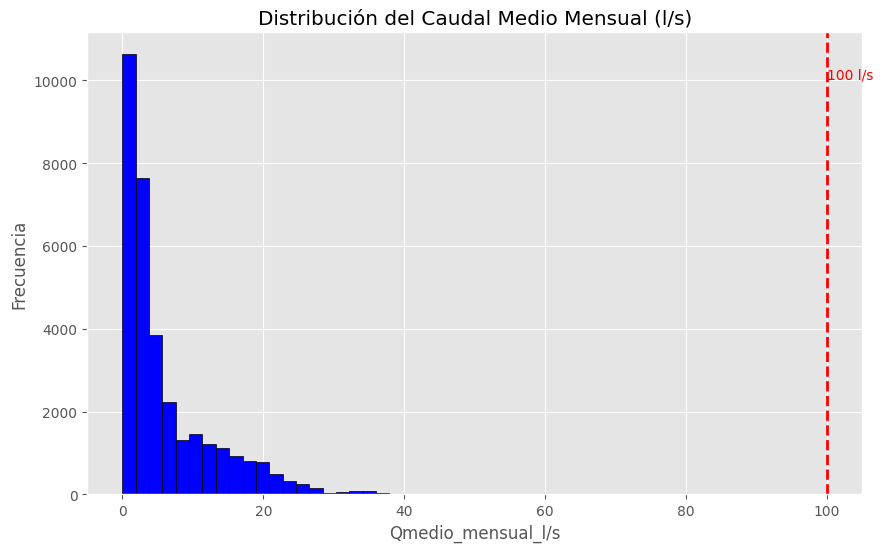

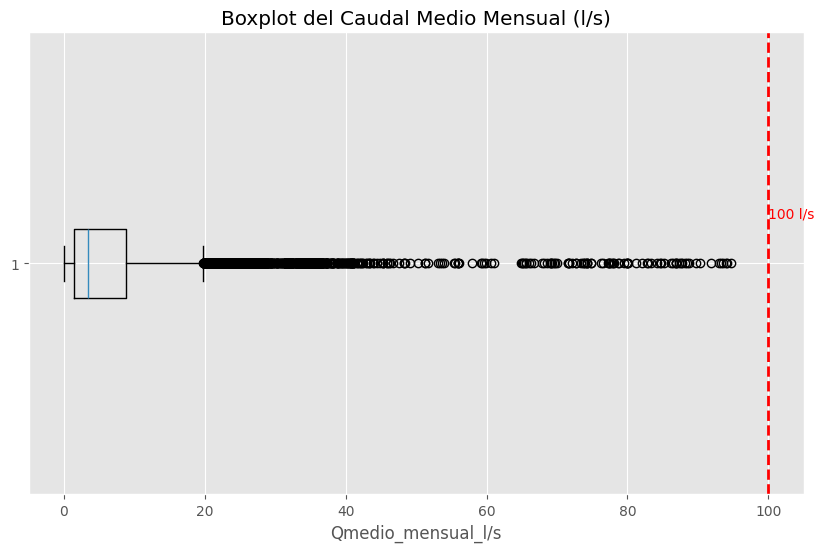

In [44]:
# Uso de las funciones
describe_caudal_mensual(Q_Medio_Mensual_filtrado)
plot_histogram(Q_Medio_Mensual_filtrado)
plot_boxplot(Q_Medio_Mensual_filtrado)

In [45]:
"""# Activa el estilo 'ggplot'
plt.style.use('ggplot')

# Estadísticas descriptivas
print("Estadísticas descriptivas del Caudal Medio Mensual Calculado:")
print(Q_Medio_Mensual_filtrado['Qmedio_mensual_l/s'].describe())

# Histograma
plt.figure(figsize=(10, 6))
plt.hist(Q_Medio_Mensual_filtrado['Qmedio_mensual_l/s'], bins=50, color='blue', edgecolor='black')
plt.title('Distribución del Caudal Medio Mensual (l/s)')
plt.xlabel('Qmedio_mensual_l/s')
plt.ylabel('Frecuencia')
plt.axvline(100, color='red', linestyle='dashed', linewidth=2)
plt.text(100, plt.ylim()[1]*0.9, '100 l/s', color='red')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(Q_Medio_Mensual_filtrado['Qmedio_mensual_l/s'], vert=False)
plt.title('Boxplot del Caudal Medio Mensual (l/s)')
plt.xlabel('Qmedio_mensual_l/s')
plt.axvline(100, color='red', linestyle='dashed', linewidth=2)
plt.text(100, 1.1, '100 l/s', color='red')
plt.show()"""


'# Activa el estilo \'ggplot\'\nplt.style.use(\'ggplot\')\n\n# Estadísticas descriptivas\nprint("Estadísticas descriptivas del Caudal Medio Mensual Calculado:")\nprint(Q_Medio_Mensual_filtrado[\'Qmedio_mensual_l/s\'].describe())\n\n# Histograma\nplt.figure(figsize=(10, 6))\nplt.hist(Q_Medio_Mensual_filtrado[\'Qmedio_mensual_l/s\'], bins=50, color=\'blue\', edgecolor=\'black\')\nplt.title(\'Distribución del Caudal Medio Mensual (l/s)\')\nplt.xlabel(\'Qmedio_mensual_l/s\')\nplt.ylabel(\'Frecuencia\')\nplt.axvline(100, color=\'red\', linestyle=\'dashed\', linewidth=2)\nplt.text(100, plt.ylim()[1]*0.9, \'100 l/s\', color=\'red\')\nplt.show()\n\n# Boxplot\nplt.figure(figsize=(10, 6))\nplt.boxplot(Q_Medio_Mensual_filtrado[\'Qmedio_mensual_l/s\'], vert=False)\nplt.title(\'Boxplot del Caudal Medio Mensual (l/s)\')\nplt.xlabel(\'Qmedio_mensual_l/s\')\nplt.axvline(100, color=\'red\', linestyle=\'dashed\', linewidth=2)\nplt.text(100, 1.1, \'100 l/s\', color=\'red\')\nplt.show()'

Se ajusta el número de registros de acuerdo a los 444 Pozos filtrados (Campo Origen en el Dataset)

In [45]:
Q_Medio_Mensual_filtrado.shape

(33718, 3)

In [46]:
negativos_Q_Medio_Mensual_filtrado = Q_Medio_Mensual_filtrado[Q_Medio_Mensual_filtrado['Qmedio_mensual_l/s'] < 0]

print("Valores negativos en 'Qmedio_mensual_l/s':")
print(negativos_Q_Medio_Mensual_filtrado)

Valores negativos en 'Qmedio_mensual_l/s':
Empty DataFrame
Columns: [Origen, Mes-Año, Qmedio_mensual_l/s]
Index: []


In [47]:
print(Q_Medio_Mensual_filtrado)

         Origen  Mes-Año  Qmedio_mensual_l/s
0      ARPES-01  01-2014            7.469478
1      ARPES-01  02-2014            7.236663
2      ARPES-01  03-2014            7.484759
3      ARPES-01  04-2014            8.274160
4      ARPES-01  05-2014            7.291134
...         ...      ...                 ...
33741   XP17-05  11-2023            0.220853
33742   XP17-05  12-2023            0.190849
33743   XP17-05  01-2024            0.371406
33744   XP17-05  02-2024            0.341201
33745   XP17-05  03-2024            0.325153

[33718 rows x 3 columns]


Valida los valores NULL o vacios para cada variable

In [48]:
# Chequeo de valores faltantes
print(Q_Medio_Mensual_filtrado.isnull().sum())

Origen                0
Mes-Año               0
Qmedio_mensual_l/s    0
dtype: int64


4. Valida el Número de Pozos contenidos en el Dataset

In [49]:
num_pozos = len(Q_Medio_Mensual_filtrado['Origen'].unique())

print("Número de Pozos:", num_pozos)

Número de Pozos: 447


5. Creación un nuevo campo Fecha

In [50]:
def create_date_column(dataframe):
    """
    Create a 'Fecha' column from 'Mes-Año' and add 'Mes' and 'Año' columns.

    Args:
        dataframe (pd.DataFrame): Input dataframe with 'Mes-Año' column.

    Returns:
        pd.DataFrame: Dataframe with new 'Fecha', 'Mes', and 'Año' columns.
    """
    dataframe['Fecha'] = pd.to_datetime(dataframe['Mes-Año'], format='%m-%Y').dt.to_period('M').dt.start_time
    dataframe['Mes'] = dataframe['Fecha'].dt.month
    dataframe['Agno'] = dataframe['Fecha'].dt.year
    return dataframe


In [51]:
Q_Medio_Mensual_filtrado = create_date_column(Q_Medio_Mensual_filtrado)
print(Q_Medio_Mensual_filtrado)


         Origen  Mes-Año  Qmedio_mensual_l/s      Fecha  Mes  Agno
0      ARPES-01  01-2014            7.469478 2014-01-01    1  2014
1      ARPES-01  02-2014            7.236663 2014-02-01    2  2014
2      ARPES-01  03-2014            7.484759 2014-03-01    3  2014
3      ARPES-01  04-2014            8.274160 2014-04-01    4  2014
4      ARPES-01  05-2014            7.291134 2014-05-01    5  2014
...         ...      ...                 ...        ...  ...   ...
33741   XP17-05  11-2023            0.220853 2023-11-01   11  2023
33742   XP17-05  12-2023            0.190849 2023-12-01   12  2023
33743   XP17-05  01-2024            0.371406 2024-01-01    1  2024
33744   XP17-05  02-2024            0.341201 2024-02-01    2  2024
33745   XP17-05  03-2024            0.325153 2024-03-01    3  2024

[33718 rows x 6 columns]


In [57]:
"""Q_Medio_Mensual_filtrado['Fecha'] = pd.to_datetime(Q_Medio_Mensual_filtrado['Mes-Año'], format='%m-%Y').dt.to_period('M').dt.start_time"""


"Q_Medio_Mensual_filtrado['Fecha'] = pd.to_datetime(Q_Medio_Mensual_filtrado['Mes-Año'], format='%m-%Y').dt.to_period('M').dt.start_time"

In [52]:
Q_Medio_Mensual_filtrado.head()

,Origen,Mes-Año,Qmedio_mensual_l/s,Fecha,Mes,Agno
0,ARPES-01,01-2014,7.469478,2014-01-01,1,2014
1,ARPES-01,02-2014,7.236663,2014-02-01,2,2014
2,ARPES-01,03-2014,7.484759,2014-03-01,3,2014
3,ARPES-01,04-2014,8.274160,2014-04-01,4,2014
4,ARPES-01,05-2014,7.291134,2014-05-01,5,2014


In [53]:
Q_Medio_Mensual_filtrado.dtypes

Origen                        object
Mes-Año                       object
Qmedio_mensual_l/s           float64
Fecha                 datetime64[ns]
Mes                            int32
Agno                           int32
dtype: object

5. Validar campo Fecha este correctamente asignada a un dato tipo Fecha. 
   Agrega dos columnas 'Mes' y 'Agno' (Año)

In [54]:
Q_Medio_Mensual_filtrado['Mes'] = Q_Medio_Mensual_filtrado['Fecha'].dt.month
Q_Medio_Mensual_filtrado['Agno'] = Q_Medio_Mensual_filtrado['Fecha'].dt.year

In [55]:
Q_Medio_Mensual_filtrado.dtypes

Origen                        object
Mes-Año                       object
Qmedio_mensual_l/s           float64
Fecha                 datetime64[ns]
Mes                            int32
Agno                           int32
dtype: object

In [56]:
print(Q_Medio_Mensual_filtrado.head())

     Origen  Mes-Año  Qmedio_mensual_l/s      Fecha  Mes  Agno
0  ARPES-01  01-2014            7.469478 2014-01-01    1  2014
1  ARPES-01  02-2014            7.236663 2014-02-01    2  2014
2  ARPES-01  03-2014            7.484759 2014-03-01    3  2014
3  ARPES-01  04-2014            8.274160 2014-04-01    4  2014
4  ARPES-01  05-2014            7.291134 2014-05-01    5  2014


Función para Validar la Cantidad de Datos por Año en Términos de Volumen

6. Válida la la cantidad de datos por año en términos de volumen

In [57]:
def plot_data_volume_per_year(Q_Medio_Mensual_filtrado):
    plt.style.use('ggplot')
    
    data_per_year = Q_Medio_Mensual_filtrado.groupby('Agno').size().reset_index(name='Counts')
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data_per_year, x='Agno', y='Counts', hue='Counts', size='Counts', sizes=(50, 500), legend=False)
    
    plt.title('Volumen de datos por año')
    plt.xlabel('Año')
    plt.ylabel('Volumen de datos')
    plt.grid(color='lightgray', linestyle='-', linewidth=0.5)
    plt.show()
    
    return data_per_year

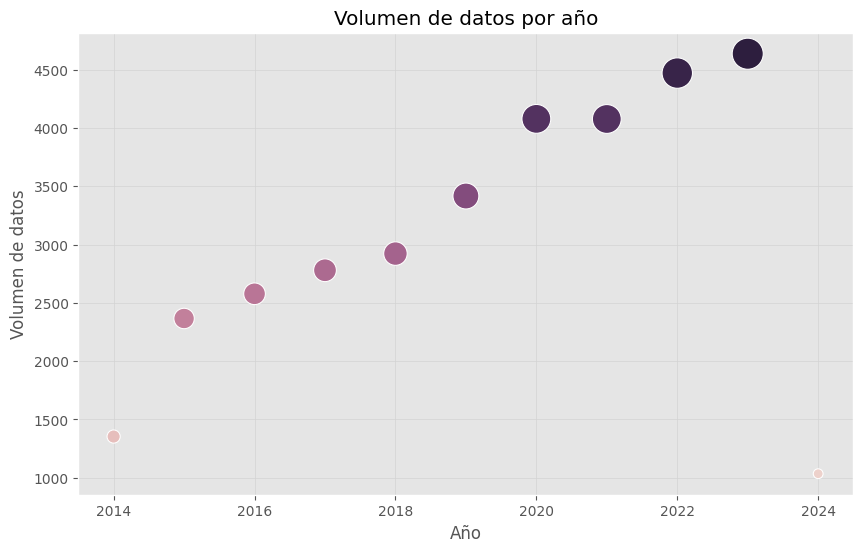

In [58]:
# Implementacion de la vizualización
data_per_year = plot_data_volume_per_year(Q_Medio_Mensual_filtrado)

### Estadísticas Descriptivas

Función para Generar Estadísticas Descriptivas

In [59]:

def calculate_descriptive_statistics(df):
    """
    Calcula las estadísticas descriptivas del DataFrame agrupado por 'Origen' y 'Fecha' (año).
    
    Args:
        df (pd.DataFrame): DataFrame que contiene los datos filtrados y procesados.

    Returns:
        pd.DataFrame: DataFrame con las estadísticas descriptivas.
    """
    df_grouped_caudal = df.groupby(['Origen', df['Fecha'].dt.year])['Qmedio_mensual_l/s']
    return df_grouped_caudal.describe()

def visualize_descriptive_statistics(df_grouped_caudal):
    """
    Muestra las estadísticas descriptivas y las guarda en un archivo Excel.

    Args:
        df_grouped_caudal (pd.DataFrame): DataFrame con las estadísticas descriptivas calculadas.
    """
    display(df_grouped_caudal)
    # Exportar a Excel (opcional)
    # df_grouped_caudal.describe().to_excel("df_grouped_caudal_describe.xlsx")

# Aplicación de las funciones
df_grouped_caudal = calculate_descriptive_statistics(Q_Medio_Mensual_filtrado)
visualize_descriptive_statistics(df_grouped_caudal)


count      mean       std       min       25%       50%  \
Origen   Fecha                                                            
ARPES-01 2014    12.0  4.219864  3.322930  0.011696  1.601483  4.246744   
         2015    12.0  7.737633  0.756155  5.743280  7.386043  8.050004   
         2016     9.0  6.696459  0.849033  5.649716  6.258709  6.645094   
         2017    12.0  6.392132  0.336112  5.926941  6.181706  6.351954   
         2018    12.0  6.581810  0.326695  5.996839  6.409910  6.515184   
...               ...       ...       ...       ...       ...       ...   
XP17-05  2020    12.0  0.408208  0.048340  0.365164  0.366679  0.394611   
         2021    12.0  0.292961  0.065102  0.181470  0.251774  0.291149   
         2022    12.0  0.311770  0.087156  0.190268  0.251430  0.291040   
         2023    12.0  0.289856  0.103845  0.134274  0.213352  0.277528   
         2024     3.0  0.345920  0.023485  0.325153  0.333177  0.341201   

                     75%       max  
Origen   Fecha                      
ARPES-01 2014   7.335720  8.274160  
         2015   8.204828  8.448999  
         2016   6.916529  8.595388  
         2017   6.426309  7.124018  
         2018   6.826598  7.173622  
...                  ...       ...  
XP17-05  2020   0.427264  0.521500  
         2021   0.345760  0.389347  
         2022   0.380088  0.445732  
         2023   0.398143  0.426855  
         2024   0.356304  0.371406  

[3643 rows x 8 columns]

In [69]:
"""df_grouped_caudal = Q_Medio_Mensual_filtrado.groupby(['Origen', Q_Medio_Mensual_filtrado['Fecha'].dt.year])['Qmedio_mensual_l/s']
df_grouped_caudal.describe()"""

"df_grouped_caudal = Q_Medio_Mensual_filtrado.groupby(['Origen', Q_Medio_Mensual_filtrado['Fecha'].dt.year])['Qmedio_mensual_l/s']\ndf_grouped_caudal.describe()"

In [70]:
"""# Activa el estilo 'ggplot'
plt.style.use('ggplot')

data_per_year = Q_Medio_Mensual_filtrado.groupby('Agno').size().reset_index(name='Counts')

plt.figure(figsize=(10,6))
sns.scatterplot(data=data_per_year, x='Agno', y='Counts', hue='Counts', size='Counts', sizes=(50, 500), legend=False)

plt.title('Volumen de datos por año')
plt.xlabel('Año')
plt.ylabel('Volumen de datos')
plt.grid(color='lightgray', linestyle='-', linewidth=0.5)"""

"# Activa el estilo 'ggplot'\nplt.style.use('ggplot')\n\ndata_per_year = Q_Medio_Mensual_filtrado.groupby('Agno').size().reset_index(name='Counts')\n\nplt.figure(figsize=(10,6))\nsns.scatterplot(data=data_per_year, x='Agno', y='Counts', hue='Counts', size='Counts', sizes=(50, 500), legend=False)\n\nplt.title('Volumen de datos por año')\nplt.xlabel('Año')\nplt.ylabel('Volumen de datos')\nplt.grid(color='lightgray', linestyle='-', linewidth=0.5)"

In [71]:
"""df_grouped_caudal = Q_Medio_Mensual_filtrado.groupby(['Origen', Q_Medio_Mensual_filtrado['Fecha'].dt.year])['Qmedio_mensual_l/s']
df_grouped_caudal.describe()
# Exportar a Excel Estadisticas Descriptivas
# df_grouped_caudal.describe().to_excel("df_grouped_caudal_describe.xlsx")"""

'df_grouped_caudal = Q_Medio_Mensual_filtrado.groupby([\'Origen\', Q_Medio_Mensual_filtrado[\'Fecha\'].dt.year])[\'Qmedio_mensual_l/s\']\ndf_grouped_caudal.describe()\n# Exportar a Excel Estadisticas Descriptivas\n# df_grouped_caudal.describe().to_excel("df_grouped_caudal_describe.xlsx")'

In [60]:
def plot_yearly_data(df, origen, y_max=10):
    """
    Grafica los datos anuales de Qmedio_mensual_l/s para un pozo específico.

    Args:
        df (pd.DataFrame): DataFrame que contiene los datos filtrados y procesados.
        origen (str): El origen (pozo) específico que se desea graficar.
        y_max (int, opcional): Límite superior del eje y. Predeterminado es 10 l/s.
    """
    plt.style.use('ggplot')
    
    # Filtrar los datos para el pozo específico
    pozo_data = df[df['Origen'] == origen].copy()
    
    # Asegurar que la columna 'Mes-Año' es de tipo datetime
    pozo_data['Mes-Año'] = pd.to_datetime(pozo_data['Mes-Año'], format='%m-%Y')

    # Graficar los datos anuales
    plt.figure(figsize=(15, 7))
    for year in pozo_data['Mes-Año'].dt.year.unique():
        yearly_data = pozo_data[pozo_data['Mes-Año'].dt.year == year]
        plt.scatter(yearly_data['Mes-Año'], yearly_data['Qmedio_mensual_l/s'], label=f'Año {year}', alpha=0.6)
    
    # Ajustar el límite superior del eje y
    plt.ylim(0, y_max)
    
    # Configurar los formatos de fecha en el eje x
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    
    # Rotar las fechas para mejor visualización
    plt.xticks(rotation=0)
    
    # Añadir etiquetas y título
    plt.xlabel('Periodo')
    plt.ylabel('Qmedio_mensual_l/s')
    plt.title(origen)
    
    # Añadir la cuadrícula
    plt.grid(True)
    
    # Ajustar el formato y añadir la leyenda
    plt.tight_layout()
    plt.legend()
    
    # Mostrar el gráfico
    plt.show()

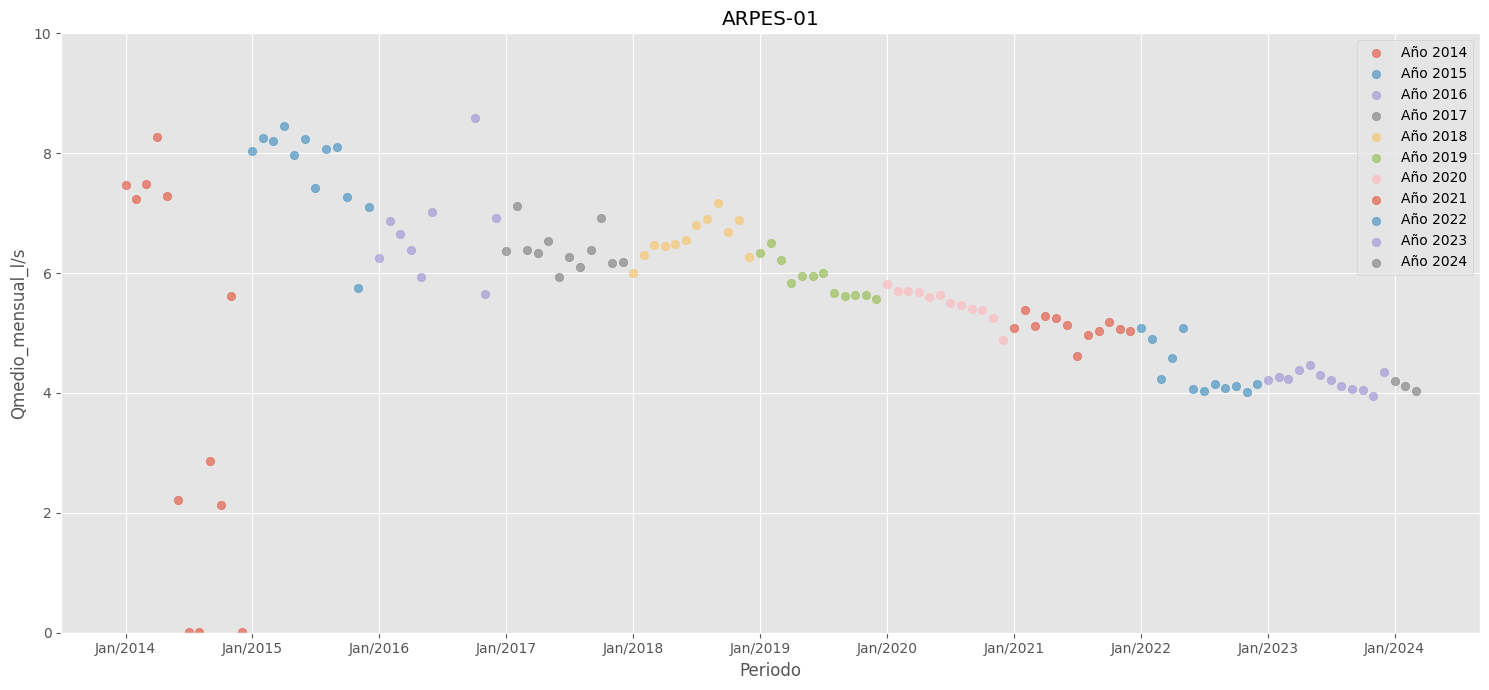

In [73]:

# Visualización de los datos anuales para un pozo específico
plot_yearly_data(Q_Medio_Mensual_filtrado, 'ARPES-01')

In [74]:
""""# Activa el estilo 'ggplot'
plt.style.use('ggplot')

# Suponiendo que Q_Medio_Mensual es tu DataFrame con los datos correctos y ya contiene una columna 'Mes-Año' de tipo datetime
arpes01_data = Q_Medio_Mensual_filtrado[Q_Medio_Mensual_filtrado['Origen'] == 'ARPES-01'].copy()

# Asegurándonos de que la columna 'Mes-Año' sea de tipo datetime
arpes01_data['Mes-Año'] = pd.to_datetime(arpes01_data['Mes-Año'], format='%m-%Y')

# Graficar todos los datos por año
plt.figure(figsize=(15, 7))
for year in arpes01_data['Mes-Año'].dt.year.unique():
    # Filtramos los datos para el año específico.
    yearly_data = arpes01_data[arpes01_data['Mes-Año'].dt.year == year]
    plt.scatter(yearly_data['Mes-Año'], yearly_data['Qmedio_mensual_l/s'], label=f'Año {year}', alpha=0.6)

# Ajustamos el límite superior del eje y a 10 l/s
plt.ylim(0, 10)  # Establecer límite inferior en 0 y superior en 10

# Configurar los formatos de fecha en el eje x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Rotamos las fechas para una mejor visualización
plt.xticks(rotation=0)

# Añadimos las etiquetas y el título
plt.xlabel('Periodo')
plt.ylabel('Qmedio_mensual_l/s')
plt.title('ARPES-01')

# Añadir la cuadrícula
plt.grid(True)

# Ajustamos el formato y añadimos la leyenda
plt.tight_layout()
plt.legend()

# Finalmente, mostramos el gráfico
plt.show()"""


'"# Activa el estilo \'ggplot\'\nplt.style.use(\'ggplot\')\n\n# Suponiendo que Q_Medio_Mensual es tu DataFrame con los datos correctos y ya contiene una columna \'Mes-Año\' de tipo datetime\narpes01_data = Q_Medio_Mensual_filtrado[Q_Medio_Mensual_filtrado[\'Origen\'] == \'ARPES-01\'].copy()\n\n# Asegurándonos de que la columna \'Mes-Año\' sea de tipo datetime\narpes01_data[\'Mes-Año\'] = pd.to_datetime(arpes01_data[\'Mes-Año\'], format=\'%m-%Y\')\n\n# Graficar todos los datos por año\nplt.figure(figsize=(15, 7))\nfor year in arpes01_data[\'Mes-Año\'].dt.year.unique():\n    # Filtramos los datos para el año específico.\n    yearly_data = arpes01_data[arpes01_data[\'Mes-Año\'].dt.year == year]\n    plt.scatter(yearly_data[\'Mes-Año\'], yearly_data[\'Qmedio_mensual_l/s\'], label=f\'Año {year}\', alpha=0.6)\n\n# Ajustamos el límite superior del eje y a 10 l/s\nplt.ylim(0, 10)  # Establecer límite inferior en 0 y superior en 10\n\n# Configurar los formatos de fecha en el eje x\nplt.gca().xa

In [61]:
def save_to_excel(df, output_path):
    """
    Guarda el DataFrame proporcionado en un archivo Excel.

    Args:
        df (pd.DataFrame): DataFrame a guardar.
        output_path (str): Ruta del archivo Excel de salida.
    """
    df.to_excel(output_path, index=False)

In [62]:
# Ejemplo de uso
Q_Medio_Mensual_filtrado_final = Q_Medio_Mensual_filtrado[['Origen', 'Fecha', 'Qmedio_mensual_l/s']].copy()
save_to_excel(Q_Medio_Mensual_filtrado_final, 'Q_Medio_Mensual_output_17072024.xlsx')
Q_Medio_Mensual_filtrado_final.head()

,Origen,Fecha,Qmedio_mensual_l/s
0,ARPES-01,2014-01-01,7.469478
1,ARPES-01,2014-02-01,7.236663
2,ARPES-01,2014-03-01,7.484759
3,ARPES-01,2014-04-01,8.274160
4,ARPES-01,2014-05-01,7.291134


# Flujo 4 preprocesamiento4 de datos
### - Agregar columna 'Mes-Año'
### - Validación Rango variable Caudal Calculada Caudal Medio Menesual l/s
### - Creación un nuevo campo Fecha
### - Valida la la cantidad de datos por año en términos de volumen
### - Generar Estadísticas Descriptivas
### - Grafica la evolución temporal del caudal medio mensual por Origen.
### - exportar archivo procesado caudal medio mensual

In [78]:
"""Q_Medio_Mensual_filtrado_final = Q_Medio_Mensual_filtrado[['Origen', 'Fecha','Qmedio_mensual_l/s']].copy()
Q_Medio_Mensual_filtrado_final.head()"""

"Q_Medio_Mensual_filtrado_final = Q_Medio_Mensual_filtrado[['Origen', 'Fecha','Qmedio_mensual_l/s']].copy()\nQ_Medio_Mensual_filtrado_final.head()"

In [79]:
"""Q_Medio_Mensual_filtrado_final.to_excel('Q_Medio_Mensual_output.xlsx', index=False)"""

"Q_Medio_Mensual_filtrado_final.to_excel('Q_Medio_Mensual_output.xlsx', index=False)"